## Мясникова Варвара, 381908-1
### Метод разделимых наименьших квадратов. Квантовые дефекты

Используя метод разделимых наименьших квадратов, построим модель вида
$$
y = \beta_1 - \beta_2 x - \frac{\arctan(\frac{\beta_3}{x-\beta_4})}{\pi}
$$

Предиктор $x$ – возбужденное состояние энергии, 
переменная отклика $y$ – число квантовых дефектов.


In [142]:
#Библиотеки
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import curve_fit
import numpy as np

In [143]:
#Исходные данные
x_data = np.array([-4868.68, -4868.09, -4867.41, -3375.19, -3373.14, -3372.03, -2473.74, -2472.35, 
                   -2469.45, -1894.65, -1893.40, -1497.24, -1495.85, -1493.41, -1208.68, -1206.18, 
                   -1206.04, -997.92, -996.61, -996.31, -834.94, -834.66, -710.03, -530.16, -464.17])
y_data = np.array([0.252429, 0.252141, 0.251809, 0.297989, 0.296257, 0.295319, 0.339603, 0.337731,
                   0.333820, 0.389510, 0.386998, 0.438864, 0.434887, 0.427893, 0.471568, 0.461699, 
                   0.461144, 0.513532, 0.506641, 0.505062, 0.535648, 0.533726, 0.568064, 0.612886, 0.624169])

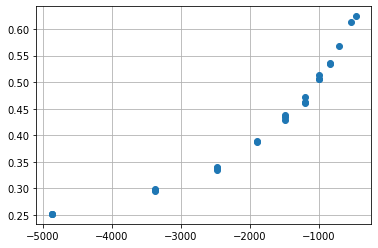

In [144]:
#График
plt.plot(x_data,y_data, 'o')
plt.grid()

In [145]:
#Функция
def func(x, b1, b2, b3, b4):
    return b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)

In [146]:
#Находим значения параметров функции методом наименьших квадратов
f_mnq, temp = curve_fit(func, x_data, y_data)
f_mnq

array([ 2.01968489e-01, -6.19532468e-06,  1.20445636e+03, -1.81343092e+02])

### Алгоритм метода разделимых наименьших квадратов:

Для точек разбиения (b3j) находим значения остальных параметров, при которых значение функции

$$
\sum_{i=1}^m (\beta_1 - \beta_2 x - \frac{\arctan(\frac{\beta_3}{x-\beta_4})}{\pi}  - y_i)^2 \tag{*}
$$
 является наименьшим. 

In [137]:
# b3 = 1.20445636e+03 = 1204.45636
# Разобьем его на 20 точек шагом 0.1, по единице в каждую сторону
b3j = np.array([1203.1, 1203.2, 1203.3, 1203.4, 1203.5, 1203.6, 1203.7, 1203.8, 1203.9, 1204.0, 
                1204.1, 1204.2, 1204.3, 1204.4, 1204.5, 1204.6, 1204.7, 1204.8, 1204.9, 1205.0])

In [180]:
#Массив, куда запишем значения функции при b3j
func_sum = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(20):
    b3 = b3j[i] 
    #Высчитываем параметры при b3j
    def func(x, b1, b2, b4):
        return b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)
    f_mnq, temp = curve_fit(func, x_data, y_data)
    #Высчитываем функцию (*)
    def fmnq(x, y, b1, b2, b4):
        return sum((b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi) - y)**2)
    
    func_sum[i] = fmnq(x_data, y_data, *f_mnq)
#Выводим минимум функции (*)
print(min(func_sum))

0.0004948484815254665


In [182]:
#Найдем индекс полученного значения минимума функции (*)
func_sum.index(0.0004948484815254665)

14

In [185]:
#14 индуксу соответствует элемент из массива b3j:
b3j[14]

1204.5

In [189]:
#Восстановим остальные параметры, используя параметр b3
b3 = b3j[14]
def func(x, b1, b2, b4):
        return b1-b2*x-(np.arctan(b3/(x-b4))/sc.pi)
    
f_mnq, temp = curve_fit(func, x_data, y_data)
f_mnq

array([ 2.01958024e-01, -6.19374343e-06, -1.81365590e+02])

#### Используя метод разделимых наименьших квадратов мы нашли неизвестные параметры с точностью до 0.1. 
#### Построим график используя найденные данные.

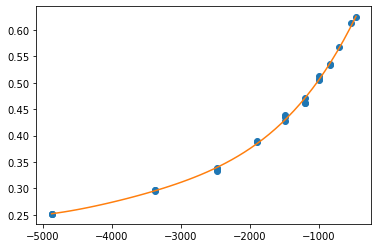

In [204]:
plt.plot(x_data,y_data, 'o') 
f = np.polyfit(x_data, y_data, 4)
xx = np.linspace(x_data[0], x_data[24], 50)
yy = np.polyval(f, xx)
plt.plot(xx, yy,color='tab:orange')
pass

### Построим эту же модель, но используя аппроксимацию полиномом

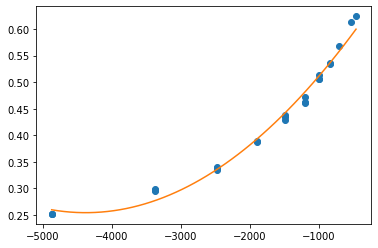

In [215]:
p = np.polyfit(x_data, y_data, 2) #2 степень многочлена
plt.plot(x_data,y_data, 'o') 
f = np.polyfit(x_data, y_data, 4)
xx = np.linspace(x_data[0], x_data[24], 50)
yy = np.polyval(p, xx)
plt.plot(xx, yy,color='tab:orange')
pass

Если сравнить графики, можно сделать вывод, что методы предоставляют разную точность.